# Geopandas


In [ ]:
import pandas as pd
import geopandas

In [ ]:
countries = geopandas.read_file("/ne_110m_admin_0_countries.zip")

In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

<Axes: >

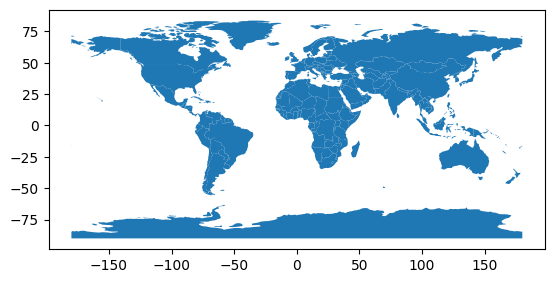

In [ ]:
countries.plot()

In [ ]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [ ]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [ ]:
countries.geometry.area

<ipython-input-35-68baff36b7de>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

## Crear un geopandas desde cero


In [ ]:
from shapely.geometry import Point
ejemplo= geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

In [ ]:
type(ejemplo)

geopandas.geodataframe.GeoDataFrame

<Axes: >

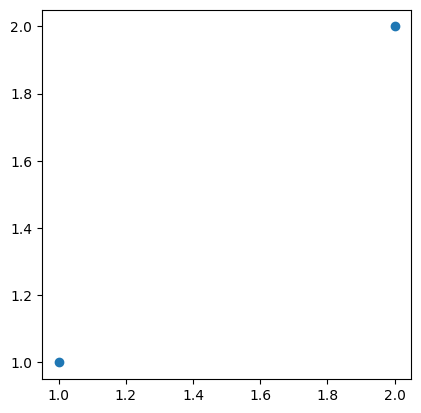

In [ ]:
ejemplo.plot()

## Crear un geopandas desde un dataframe ya establecido

In [ ]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf

City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)

In [ ]:
countries['pop_est'].mean()

41712369.84180791

In [ ]:
africa = countries[countries['continent'] == 'Africa']

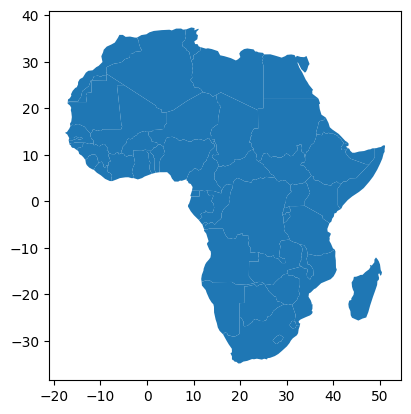

In [ ]:
africa.plot();

In [ ]:
africa['area'] = africa.geometry.area
africa['perimeter'] = africa.geometry.length
print(africa)

    iso_a3                  name continent      pop_est  gdp_md_est  \
1      AGO                Angola    Africa   29310273.0    189000.0   
11     BDI               Burundi    Africa   11466756.0      7892.0   
13     BEN                 Benin    Africa   11038805.0     24310.0   
14     BFA          Burkina Faso    Africa   20107509.0     32990.0   
25     BWA              Botswana    Africa    2214858.0     35900.0   
26     CAF  Central African Rep.    Africa    5625118.0      3206.0   
31     CIV         Côte d'Ivoire    Africa   24184810.0     87120.0   
32     CMR              Cameroon    Africa   24994885.0     77240.0   
33     COD       Dem. Rep. Congo    Africa   83301151.0     66010.0   
34     COG                 Congo    Africa    4954674.0     30270.0   
42     DJI              Djibouti    Africa     865267.0      3345.0   
45     DZA               Algeria    Africa   40969443.0    609400.0   
47     EGY                 Egypt    Africa   97041072.0   1105000.0   
48    

<ipython-input-45-2c4c4c447155>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa['area'] = africa.geometry.area
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-45-2c4c4c447155>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa['perimeter'] = africa.geometry.length
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCo

In [ ]:
# Especifica el sistema de coordenadas proyectadas deseado (por ejemplo, EPSG:3395 para proyección Mercator)
target_crs = 'EPSG:3395'

# Proyectar las geometrías al sistema de coordenadas proyectadas
africa = africa.to_crs(target_crs)

# Calcular el área y el perímetro
africa['area'] = africa.geometry.area
africa['perimeter'] = africa.geometry.length

# Mostrar el GeoDataFrame resultante
print(africa)

    iso_a3                  name continent      pop_est  gdp_md_est  \
1      AGO                Angola    Africa   29310273.0    189000.0   
11     BDI               Burundi    Africa   11466756.0      7892.0   
13     BEN                 Benin    Africa   11038805.0     24310.0   
14     BFA          Burkina Faso    Africa   20107509.0     32990.0   
25     BWA              Botswana    Africa    2214858.0     35900.0   
26     CAF  Central African Rep.    Africa    5625118.0      3206.0   
31     CIV         Côte d'Ivoire    Africa   24184810.0     87120.0   
32     CMR              Cameroon    Africa   24994885.0     77240.0   
33     COD       Dem. Rep. Congo    Africa   83301151.0     66010.0   
34     COG                 Congo    Africa    4954674.0     30270.0   
42     DJI              Djibouti    Africa     865267.0      3345.0   
45     DZA               Algeria    Africa   40969443.0    609400.0   
47     EGY                 Egypt    Africa   97041072.0   1105000.0   
48    

In [ ]:
africa = africa.assign(group=1)
africa_boundary = africa.dissolve(by = 'group')
africa.head()

GEOSException: ignored

In [ ]:
africa['geometry'] = africa['geometry'].buffer(0)
africa = africa.assign(group=1)
africa_boundary = africa.dissolve(by='group')

<Axes: >

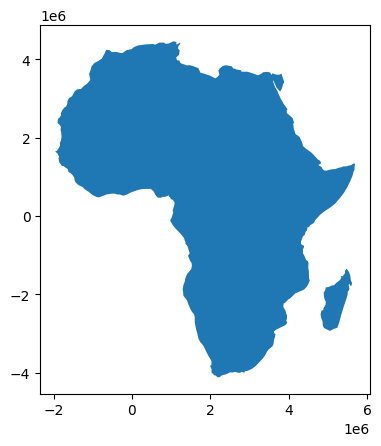

In [ ]:
africa_boundary.plot()

In [ ]:
lfb = pd.read_csv('/lfb_2009_2020.csv')
lfb.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing  
0         Norbury   532350    170050  
1        Woodside   534750    167550  
2      Wallington   528050    164950  
3         Ruislip   504650    190650  
4     Harold Hill   554650    192350

<Axes: >

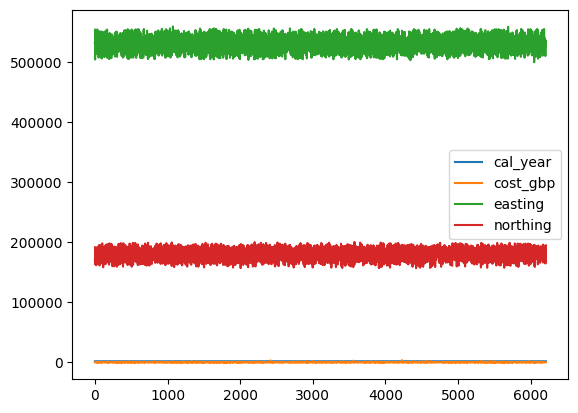

In [ ]:
lfb.plot()

In [ ]:
lfb_gdf  = geopandas.GeoDataFrame(lfb,geometry=geopandas.points_from_xy(lfb.easting,lfb.northing), crs = 'EPSG:27700')

In [ ]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing                       geometry  
0         Norbury   532350    170050  POINT (532350.000 170050.000)  
1        Woodside   534750    167550  POINT (534750.000 167550.000)  
2      Wallington   528050    164950  POINT (528050.000 164950.000)  
3         Ruislip   504650    190650  POINT (504650.000 190650.000)  
4     Harold Hill   554650    192350  POINT (554650.000 192350.000)

<Axes: >

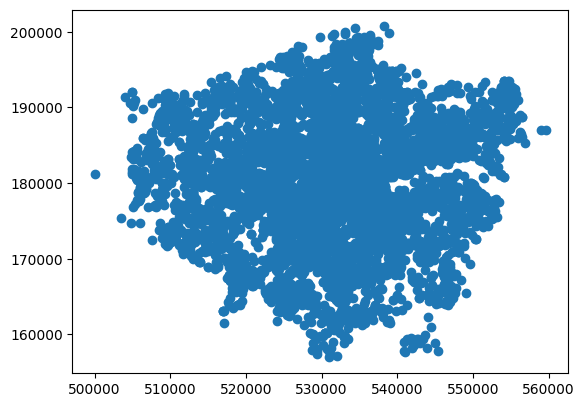

In [ ]:
lfb_gdf.plot()

In [ ]:
utla_2019 = geopandas.read_file('/London_and_surrounding_UTLAs.shp')

In [ ]:
lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')

<ipython-input-57-3cbddd6e1ff4>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: EPSG:4326

  lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')


In [ ]:
utla_2019.crs == lfb_gdf.crs

False

In [ ]:
utla_2019 = utla_2019.to_crs(epsg=27700)

In [ ]:
utla_2019.crs == lfb_gdf.crs

True

In [ ]:
lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')

In [ ]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing                       geometry  
0         Norbury   532350    170050  POINT (532350.000 170050.000)  
1        Woodside   534750    167550  POINT (534750.000 167550.000)  
2      Wallington   528050    164950  POINT (528050.000 164950.000)  
3         Ruislip   504650    190650  POINT (504650.000 190650.000)  
4     Harold Hill   554650    192350  POINT (554650.000 192350.000)

<Axes: >

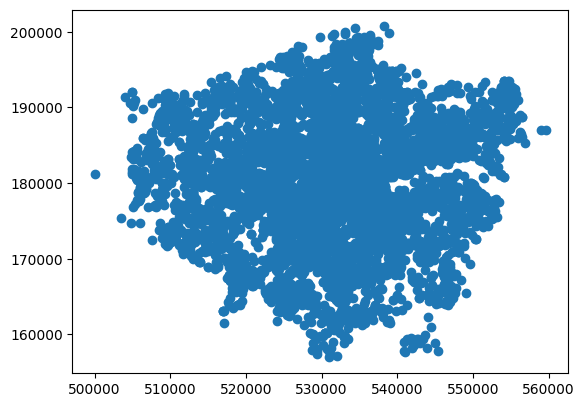

In [ ]:
lfb_gdf.plot()

In [ ]:
msoa_london = geopandas.read_file('/MSOA_2011_BSC_London.shp')


<Axes: >

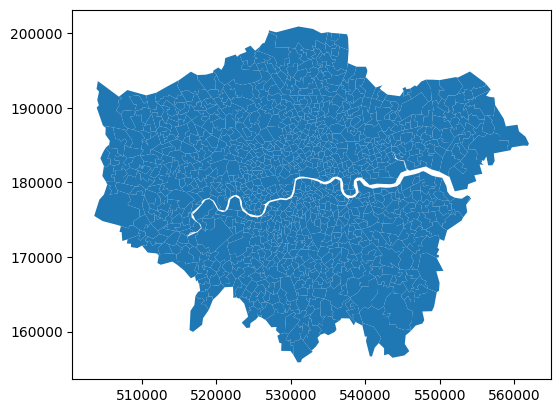

In [ ]:
msoa_london.plot()

In [ ]:
msoa_london.head()

MSOA11CD                                           geometry
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...
1  E02000002  POLYGON ((549000.726 190873.464, 549120.966 18...
2  E02000003  POLYGON ((548954.517 189063.241, 549085.611 18...
3  E02000004  POLYGON ((551943.782 186027.614, 551670.827 18...
4  E02000005  POLYGON ((549418.680 187442.412, 548983.438 18...

In [ ]:
msoa_london.crs == lfb_gdf.crs

True

In [ ]:
london_msoa_lfb = geopandas.sjoin(msoa_london, lfb_gdf, how = 'inner', predicate = 'intersects')

In [ ]:
london_msoa_lfb.head()

MSOA11CD                                           geometry  index_right  \
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         4205   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         6066   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         5334   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         1698   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         2322   

  incident_number  cal_year type_of_incident  cost_gbp  \
0           B4429      2016  Special Service     326.0   
0           B6358      2019  Special Service     339.0   
0           B5589      2018  Special Service     333.0   
0           B1784      2011  Special Service     520.0   
0           B2438      2013  Special Service     260.0   

                       final_description animal_group_parent  \
0        ASSIST RSPCA WITH TRAPPED BIRDS                Bird   
0  BIRD TRAPPED UNDER LEDGE ON 7TH FLOOR                Bird   
0            SEAGULL TRAPPED BEHIND DOOR                Bird   
0                   BIRD TRAPPED IN WIRE                Bird   
0    ASSIST RSCPA WITH PIGEON TRAPPED OS                Bird   

  property_category  ward_code          ward stn_ground_name  easting  \
0   Non Residential  E05009303       DOWGATE         Dowgate   532650   
0   Non Residential  E05009291  BILLINGSGATE         Dowgate   533150   
0   Non Residential  E05009296    CANDLEWICK         Dowgate   532850   
0           Outdoor  E05009303       Dowgate         Dowgate   532550   
0   Non Residential  E05009306     Langbourn         Dowgate   532950   

   northing  
0    180850  
0    180850  
0    180850  
0    180850  
0    180950

<Axes: >

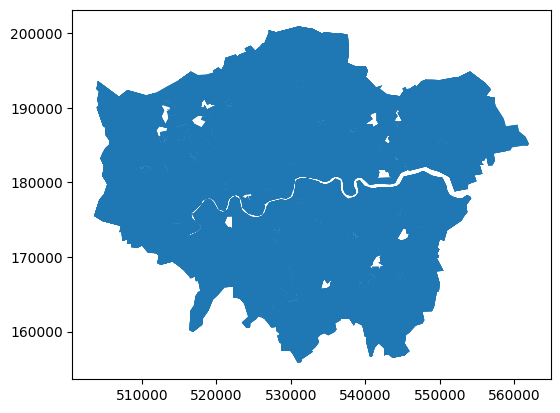

In [ ]:
london_msoa_lfb.plot()

In [ ]:
lfb_msoa_symmetric_difference = geopandas.overlay(lfb_gdf, london_msoa_lfb, how='symmetric_difference',keep_geom_type=True)

In [ ]:
lfb_msoa_symmetric_difference

incident_number_1  cal_year_1 type_of_incident_1  cost_gbp_1  \
0                D33      2009.0    Special Service       255.0   
1                D54      2009.0    Special Service       255.0   
2                D60      2009.0    Special Service       765.0   
3                C71      2009.0    Special Service      1275.0   
4               D218      2009.0    Special Service       260.0   
5              D1087      2010.0    Special Service       260.0   
6              B1122      2010.0    Special Service       260.0   
7              D1269      2011.0    Special Service         NaN   
8              D1925      2012.0    Special Service       260.0   
9              D2074      2012.0    Special Service       260.0   
10             D2178      2012.0    Special Service       260.0   
11             C2216      2012.0    Special Service       260.0   
12             C2276      2012.0    Special Service         NaN   
13             H2305      2012.0    Special Service       260.0   
14             D2391      2012.0    Special Service       260.0   
15             H2641      2013.0    Special Service       290.0   
16             B2928      2013.0    Special Service       290.0   
17             B3062      2014.0    Special Service       290.0   
18             H3154      2014.0    Special Service       295.0   
19             F3267      2014.0    Special Service       295.0   
20             D3591      2015.0    Special Service       295.0   
21             C3617      2015.0    Special Service       295.0   
22             B3688      2015.0    Special Service       298.0   
23             H3777      2015.0    Special Service       894.0   
24             D3818      2015.0    Special Service       298.0   
25             D3919      2015.0    Special Service         NaN   
26             C4138      2016.0    Special Service       596.0   
27             D4165      2016.0    Special Service       298.0   
28             D4246      2016.0    Special Service       652.0   
29             B4327      2016.0    Special Service       978.0   
30             H4568      2016.0    Special Service       326.0   
31             D4666      2016.0    Special Service       326.0   
32             D4717      2017.0    Special Service       652.0   
33             C4779      2017.0    Special Service       326.0   
34             D4805      2017.0    Special Service       326.0   
35             D4848      2017.0    Special Service       328.0   
36             B5025      2017.0    Special Service       328.0   
37             D5151      2017.0    Special Service         NaN   
38             D5248      2017.0    Special Service       328.0   
39             C5365      2018.0    Special Service       333.0   
40             D5375      2018.0    Special Service         NaN   
41             C5479      2018.0    Special Service       999.0   
42             C5854      2018.0    Special Service       333.0   
43             F6229      2019.0    Special Service       678.0   
44             B6327      2019.0    Special Service       339.0   
45             H6339      2019.0    Special Service       678.0   
46             F6360      2019.0    Special Service       678.0   

                                  final_description_1 animal_group_parent_1  \
0            DOG TRAPPED IN DRAIN UNDER BANDSTAND,B15                   Dog   
1                 DOG STUCK IN MUD ON SHORELINE  ,J15                   Dog   
2                                     DOG IN LAKE,J15                   Dog   
3                             KITTEN STUCK IN MUD,J15                   Cat   
4                          DOG CAUGHT IN BRAMBLES,B15                   Dog   
5                         DOG IN RIVER ALONG TOW PATH                   Dog   
6                     BIRD TRAPPED BETWEEN ROOF TILES                  Bird   
7                            DOG IN DISTRESS IN RIVER                   Dog   
8             DOG TRAPPED ON MUD BANK OF RIVER THAMES                   Dog

<Axes: >

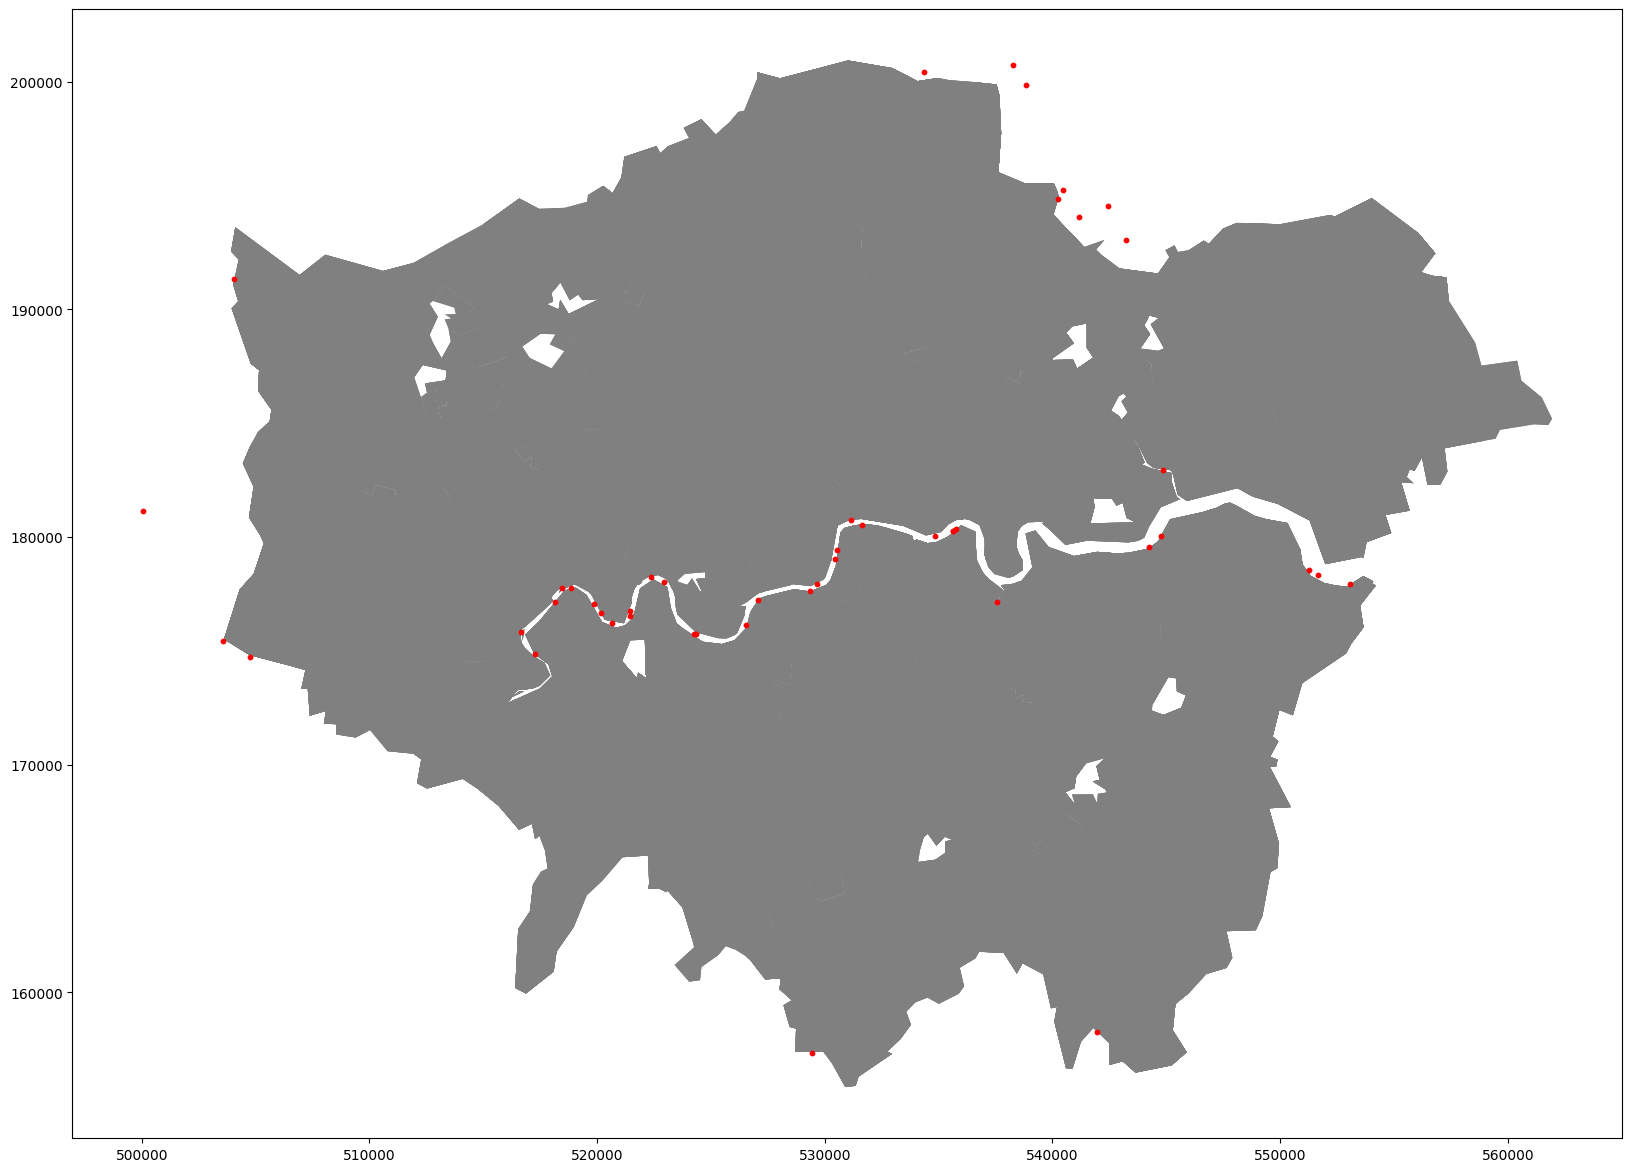

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
london_msoa_lfb.plot(ax=ax, color='grey')
lfb_msoa_symmetric_difference.plot(ax=ax, marker='o', color='red', markersize=10)

In [ ]:
lfb_msoa_stats = london_msoa_lfb.groupby('MSOA11CD').cost_gbp.agg(['count', 'sum']).reset_index().rename(columns={'count': 'incendios_totales', 'sum': 'costo_total'})

In [ ]:
lfb_msoa_stats.head()

MSOA11CD  incendios_totales  costo_total
0  E02000001                 13       4083.0
1  E02000002                  6       1926.0
2  E02000003                 11       4779.0
3  E02000004                  7       2917.0
4  E02000005                  5       1411.0

In [ ]:
lfb_msoa_stats['cost_per_incident'] = lfb_msoa_stats.costo_total/lfb_msoa_stats.incendios_totales

In [ ]:
lfb_msoa_stats.head()

MSOA11CD  incendios_totales  costo_total  cost_per_incident
0  E02000001                 13       4083.0         314.076923
1  E02000002                  6       1926.0         321.000000
2  E02000003                 11       4779.0         434.454545
3  E02000004                  7       2917.0         416.714286
4  E02000005                  5       1411.0         282.200000

In [ ]:
msoa_lfb = pd.merge(msoa_london, lfb_msoa_stats, on = 'MSOA11CD', how = 'left')

In [ ]:
msoa_lfb.head()

MSOA11CD                                           geometry  \
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...   
1  E02000002  POLYGON ((549000.726 190873.464, 549120.966 18...   
2  E02000003  POLYGON ((548954.517 189063.241, 549085.611 18...   
3  E02000004  POLYGON ((551943.782 186027.614, 551670.827 18...   
4  E02000005  POLYGON ((549418.680 187442.412, 548983.438 18...   

   incendios_totales  costo_total  cost_per_incident  
0               13.0       4083.0         314.076923  
1                6.0       1926.0         321.000000  
2               11.0       4779.0         434.454545  
3                7.0       2917.0         416.714286  
4                5.0       1411.0         282.200000

<Axes: >

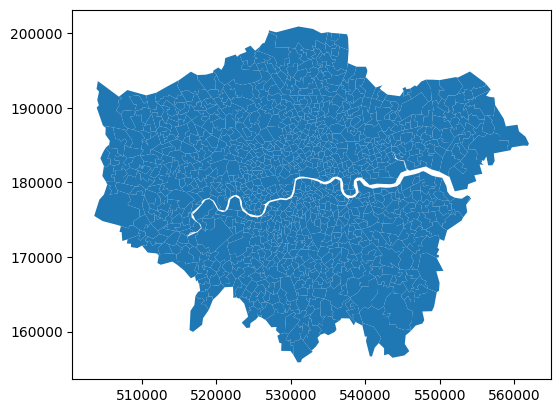

In [ ]:
msoa_lfb.plot()

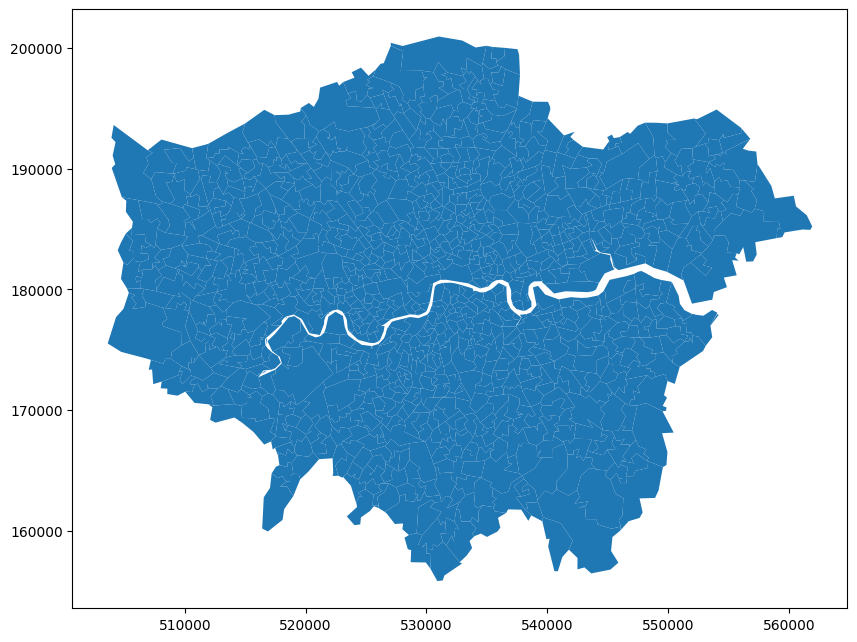

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(ax=ax)

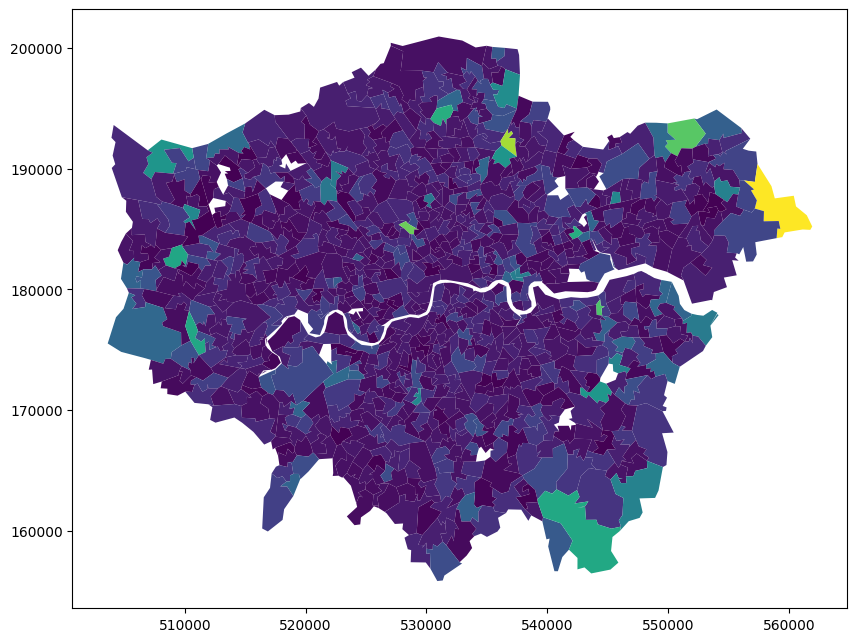

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(column='cost_per_incident', ax=ax)

In [ ]:
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.8 MB/s eta 0:00:00


In [ ]:
!pip install mapclassify

In [ ]:
from mapclassify import Quantiles

<Axes: >

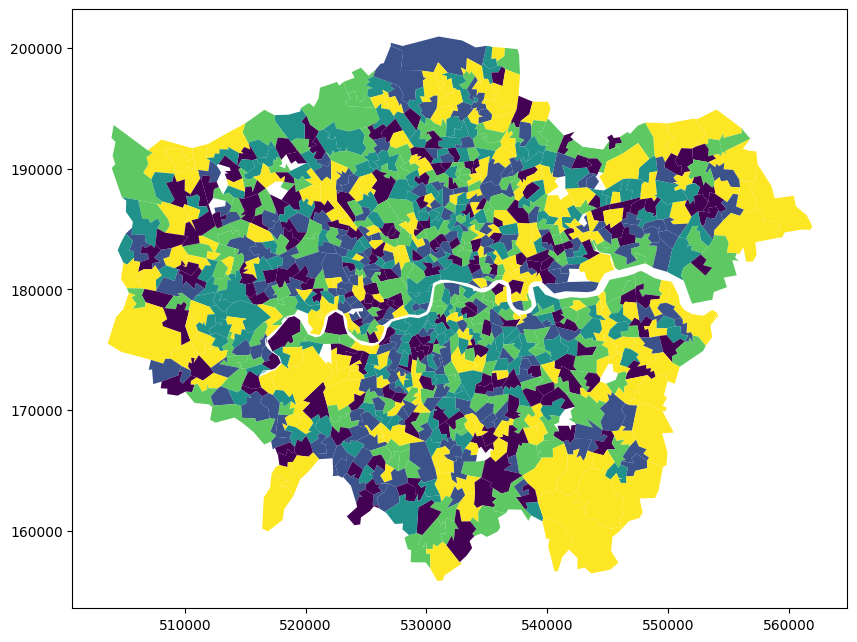

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, ax=ax)

<Axes: >

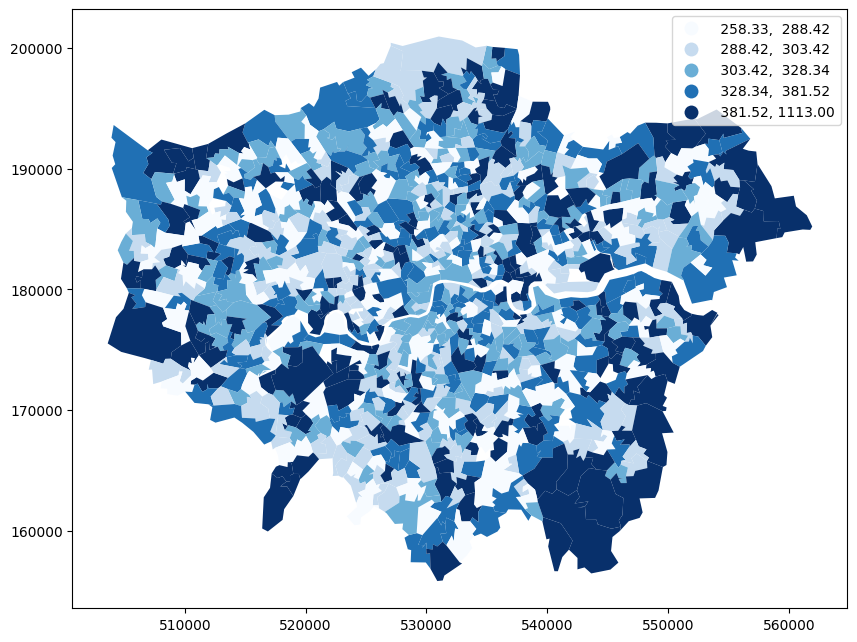

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, cmap = 'Blues', legend =True, ax=ax)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

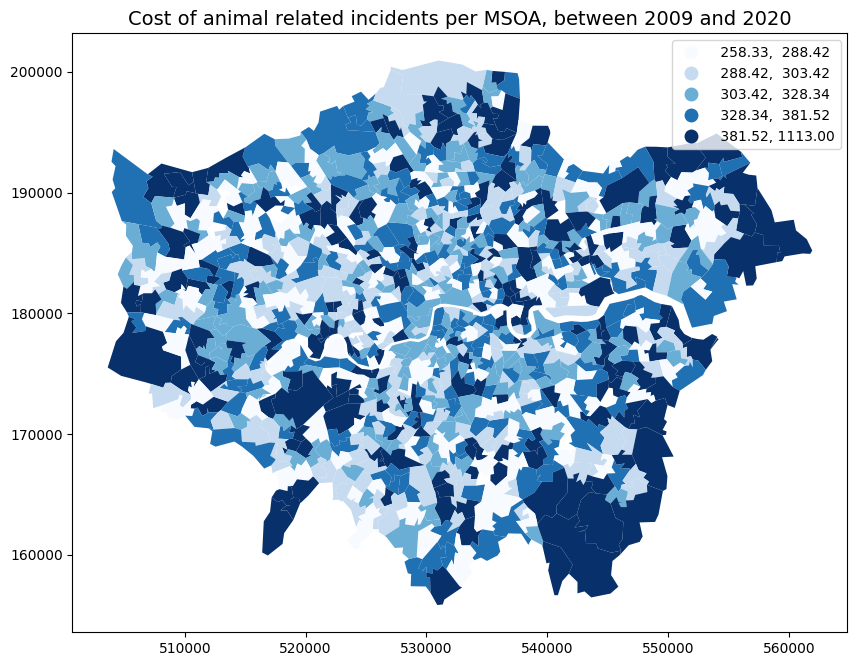

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'cost_per_incident', ax = ax, scheme='QUANTILES', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

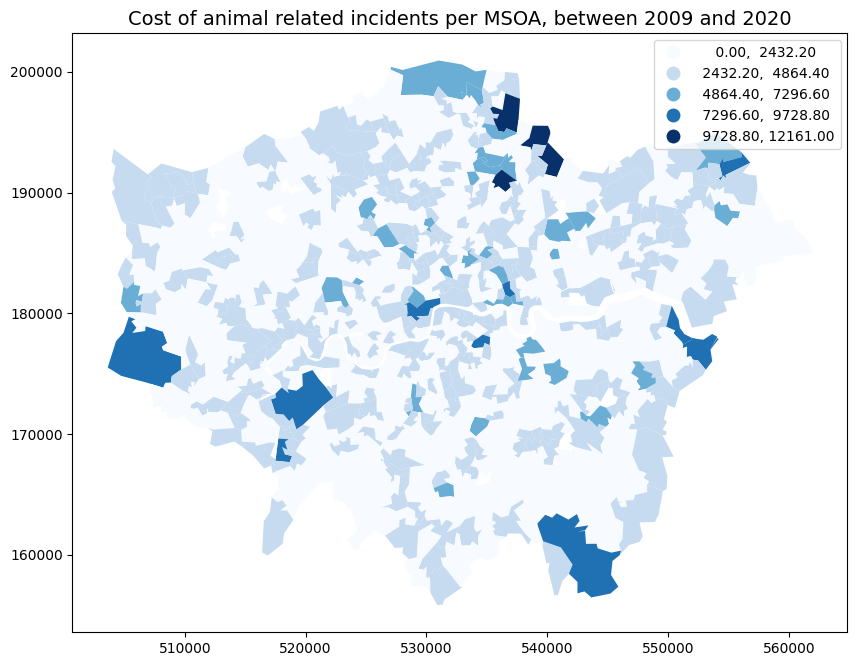

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'costo_total', ax = ax, scheme='equal_interval', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

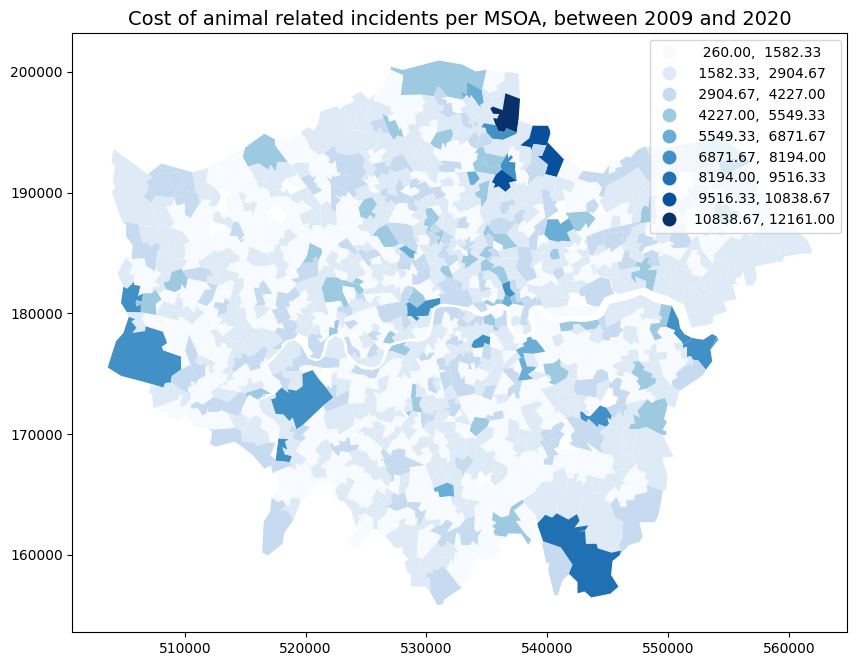

In [ ]:
ax = msoa_lfb.dropna().plot(column='costo_total', cmap='Blues', figsize=(10,10), scheme='equal_interval', k=9, legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

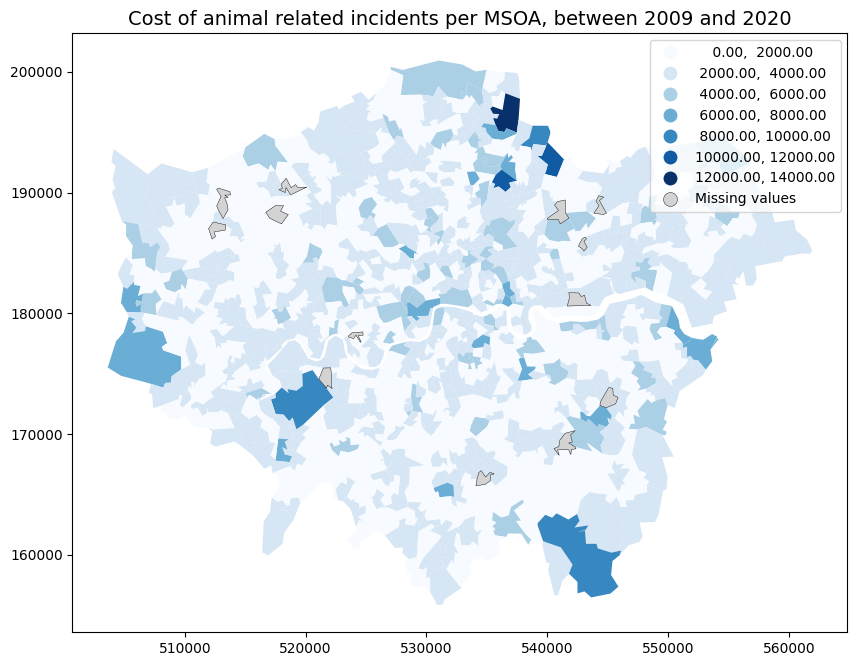

In [ ]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', figsize=(10,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

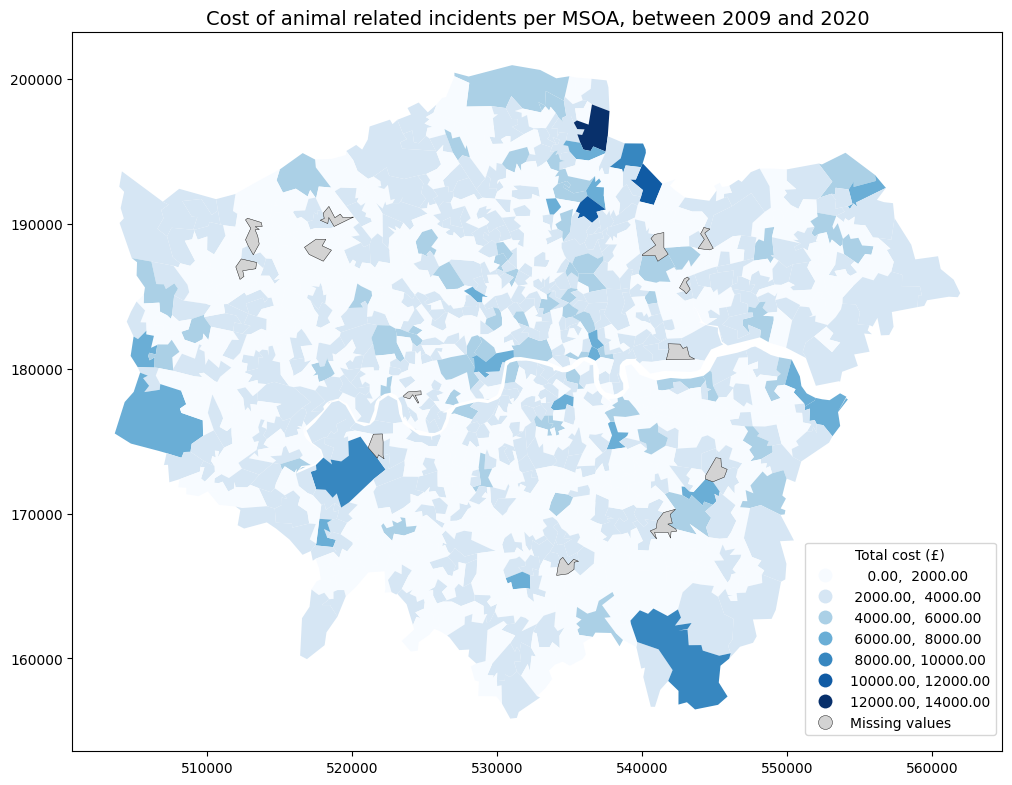

In [ ]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.3), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

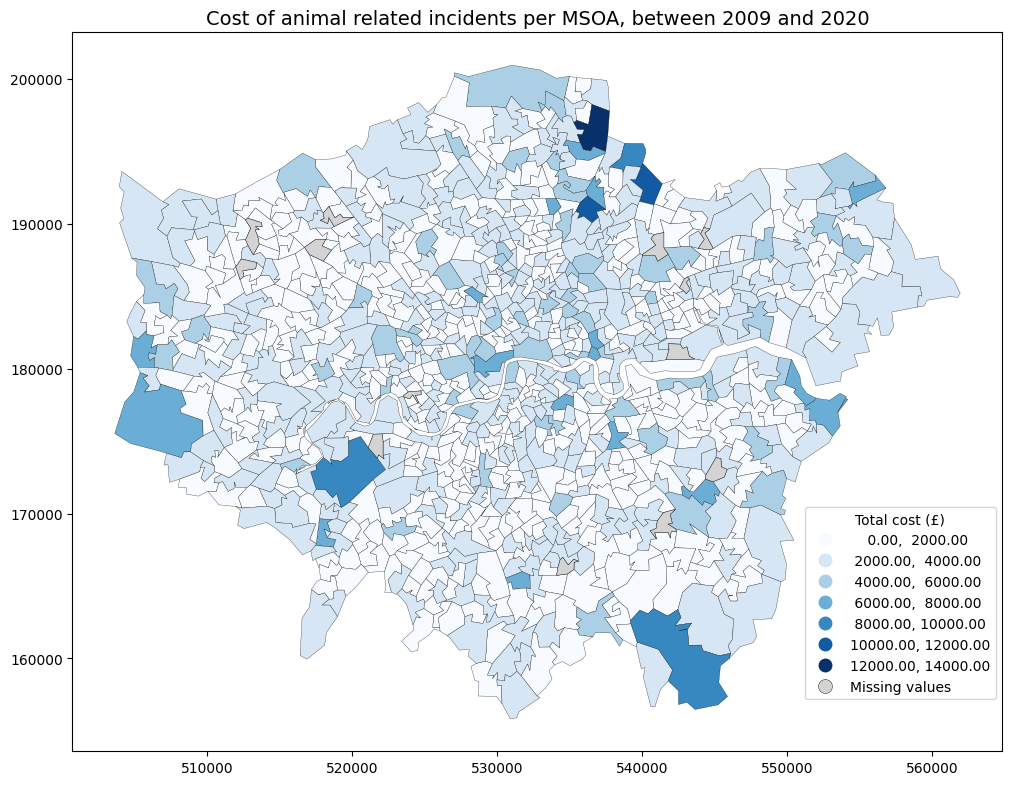

In [ ]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', edgecolor = 'k',
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.35), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

In [ ]:
ax = msoa_lfb.plot(column='cost_per_incident', cmap='Blues', edgecolor = 'k',
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)